# 거시경제 일반지표 통합
- 2020.08.29 작업본  

(상세 기술 추가 예정) 


In [1]:
# Import data handling Packages
import pandas as pd
import glob
import re

In [2]:
# Set Data directory
data_dir = 'C:/Users/seoun/Desktop/Python/milestone_data/'
save_dir = 'C:/Users/seoun/Desktop/Python/milestone_data/datasets/'


In [3]:
# 세부 경로
lv_dir = '거시경제_및_일반지표/02.일반지표/'
file_list = glob.glob(data_dir+lv_dir+ '*.xlsx')
file_list

['C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/02.일반지표\\세대수.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/02.일반지표\\이동건수.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/02.일반지표\\인구수.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/02.일반지표\\인구이동.xlsx']

In [4]:
# import raw data

gen1_df = pd.read_excel(file_list[0], sheet_name=0, header=10, index_col=0).T # 세대수.xlsx 
gen2_df = pd.read_excel(file_list[1], sheet_name=0, header=10, index_col=0).T # 이동건수.xlsx 
gen3_df = pd.read_excel(file_list[2], sheet_name=0, header=10, index_col=0).T # 인구수.xlsx 
gen4_df = pd.read_excel(file_list[3], sheet_name=0, header=10, index_col=0).T # 인구이동.xlsx 


In [5]:
gen1_df.tail() # 기준년도 # 세대수 
# gen2_df.tail() # 기준년월 # 이동건수 
# gen3_df.tail() # 기준년도 # 인구수 
# gen4_df.tail() # 기준년월 # 인구이동 

지 역,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2013년,20456588,4182351,1404663,960265,1118988,563599,584877,431595,50045,4712324,664913,644062,857699,766699,815769,1139387,1320887,238465
2014년,20724094,4194176,1421648,970618,1136280,573043,592508,442250,62807,4786718,673978,656321,871459,774562,823667,1153559,1343984,246516
2015년,21011152,4189948,1437818,982360,1154004,580427,597008,451688,81806,4885012,685005,669503,885968,782986,833901,1169648,1367142,256928
2016년,21294009,4189839,1451270,994220,1171399,586464,606137,455352,94343,5003406,692254,680960,902294,790084,842688,1180643,1385684,266972
2017년,21632851,4220082,1467555,1006753,1188917,592818,614639,458547,109490,5131379,700265,692140,923499,797916,851376,1193261,1406011,278203


In [6]:
# 결측값 체크 
print('\n', "# 결측 값 변환 전, 결측 데이터 수 ===================")
print("# 세대수.xlsx  ---------------")
print('결측(None)값 갯수: ', gen1_df.isnull().sum().sum())
print("결측('-')값 갯수: ", gen1_df.eq('-').sum().sum())

print('\n', "# 이동건수.xlsx  -------------")
print('결측(None)값 갯수: ', gen2_df.isnull().sum().sum())
print("결측('-')값 갯수: ", gen2_df.eq('-').sum().sum())

print('\n', "# 인구수.xlsx  ---------------")
print('결측(None)값 갯수: ', gen3_df.isnull().sum().sum())
print("결측('-')값 갯수: ", gen3_df.eq('-').sum().sum())

print('\n', "# 인구이동.xlsx  ------------")
print('결측(None)값 갯수: ', gen4_df.isnull().sum().sum())
print("결측('-')값 갯수: ", gen4_df.eq('-').sum().sum())

# ===========================================================
# 결측('-')값 > 'None' 변환 
gen1_df.replace({'-': None}, inplace=True)
gen2_df.replace({'-': None}, inplace=True)
gen3_df.replace({'-': None}, inplace=True)
gen4_df.replace({'-': None}, inplace=True)

# ===========================================================
# 변환 후, 결측값 체크 
print('\n', "# 결측 값 변환 후, 결측 데이터 수 ===================")
print('\n', "# 세대수.xlsx  ---------------")
print('결측(None)값 갯수: ', gen1_df.isnull().sum().sum())
print("결측('-')값 갯수: ", gen1_df.eq('-').sum().sum())

print('\n', "# 이동건수.xlsx  -------------")
print('결측(None)값 갯수: ', gen2_df.isnull().sum().sum())
print("결측('-')값 갯수: ", gen2_df.eq('-').sum().sum())

print('\n', "# 인구수.xlsx  ---------------")
print('결측(None)값 갯수: ', gen3_df.isnull().sum().sum())
print("결측('-')값 갯수: ", gen3_df.eq('-').sum().sum())

print('\n', "# 인구이동.xlsx  ------------")
print('결측(None)값 갯수: ', gen4_df.isnull().sum().sum())
print("결측('-')값 갯수: ", gen4_df.eq('-').sum().sum())



 # 결측 값 변환 전, 결측 데이터 수 ===================
# 세대수.xlsx  ---------------
결측(None)값 갯수:  0
결측('-')값 갯수:  25

 # 이동건수.xlsx  -------------
결측(None)값 갯수:  0
결측('-')값 갯수:  138

 # 인구수.xlsx  ---------------
결측(None)값 갯수:  0
결측('-')값 갯수:  25

 # 인구이동.xlsx  ------------
결측(None)값 갯수:  0
결측('-')값 갯수:  1518

 # 결측 값 변환 후, 결측 데이터 수 ===================

 # 세대수.xlsx  ---------------
결측(None)값 갯수:  25
결측('-')값 갯수:  0

 # 이동건수.xlsx  -------------
결측(None)값 갯수:  138
결측('-')값 갯수:  0

 # 인구수.xlsx  ---------------
결측(None)값 갯수:  25
결측('-')값 갯수:  0

 # 인구이동.xlsx  ------------
결측(None)값 갯수:  1518
결측('-')값 갯수:  0


C:\Users\seoun\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [7]:
# 전국추세, 서울 집계에 대해서만 추출 
common_cols13 = ['전국','서울'] # : 세대수, 인구수 df 에서 추출
common_cols24 = ['서울']        # : 세대이동, 인구이동 df 에서 추출 

gen1_part_df = gen1_df[common_cols13]
gen3_part_df = gen3_df[common_cols13]
gen2_part_df = gen2_df[common_cols24]
gen4_part_df = gen4_df[common_cols24]

In [8]:
# 컬럼 index name 누락
gen1_part_df.columns.rename(None,inplace=True)
gen3_part_df.columns.rename(None,inplace=True)
gen2_part_df.columns.rename(None,inplace=True)
gen4_part_df.columns.rename(None,inplace=True)

# index Name 지정
gen1_part_df.index.rename('기준년도', inplace=True)
gen3_part_df.index.rename('기준년도', inplace=True)
gen2_part_df.index.rename('기준년월', inplace=True)
gen4_part_df.index.rename('기준년월', inplace=True)

# df별 공통속성명 중복방지(prefix 추가)
gen1_part_df = gen1_part_df.add_prefix('세대수_')
gen3_part_df = gen3_part_df.add_prefix('인구수_')
gen2_part_df = gen2_part_df.add_prefix('세대이동_')
gen4_part_df = gen4_part_df.add_prefix('인구이동_')


### * 2.1 거시경제 일반지표 연주기지표

In [9]:
# 지수주기 별 통합
# 기준년도 단위
frames = [gen1_part_df, gen3_part_df]
gen_years_df = pd.concat(frames, axis=1).reset_index()


In [10]:
gen_years_df.tail()

,기준년도,세대수_전국,세대수_서울,인구수_전국,인구수_서울
21,2013년,20456588,4182351,51141463,10143645
22,2014년,20724094,4194176,51327916,10103233
23,2015년,21011152,4189948,51529338,10022181
24,2016년,21294009,4189839,51696216,9930616
25,2017년,21632851,4220082,51778544,9857426


In [11]:
# export Dataframe
gen_years_df.to_csv(save_dir+'01.거시경제지표_연주기지표.csv', encoding='euc-kr', index=False)

### * 2.2 거시경제 일반지표 월주기+광역시도구분지표
: 1. 거시경제지표_전처리 과정에서 생성한 '월주기+광역시도지표.csv'에 통합  

In [12]:
macro_months_provs_df = pd.read_csv(save_dir+'01.거시경제지표_월주기+광역시도지표.csv', 
                                    encoding='euc-kr', index_col='기준년월')  
macro_months_provs_df.head()

,가계대출_전국,가계대출_서울,주택대출_전국,주택대출_서울
기준년월,,,,
2007년 12월,474094.4,163372.6,291082.9,107469.2
2008년 01월,473606.9,163223.8,291623.3,107433.5
2008년 02월,476919.4,164072.1,290639.0,106294.4
2008년 03월,480414.6,165192.6,291617.7,106393.8
2008년 04월,485302.9,166904.7,294082.5,107235.2


In [13]:
# 지수주기 별 통합
# 기준년월 단위
frames = [macro_months_provs_df, gen2_part_df, gen4_part_df]
gen_months_provs_df = pd.concat(frames, axis=1).reset_index()

gen_months_provs_df.rename(columns={'index':'기준년월'}, inplace=True)

C:\Users\seoun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [14]:
gen_months_provs_df.tail()

,기준년월,가계대출_전국,가계대출_서울,주택대출_전국,주택대출_서울,세대이동_서울,인구이동_서울
601,2020년 02월,1086425.4,326252.6,635282.9,196654.8,6052.0,3305
602,2020년 03월,1094531.8,330397.8,639598.1,198287.6,1525.0,-3404
603,2020년 04월,1099520.7,332221.8,644393.0,200025.0,-1952.0,-7117
604,2020년 05월,1103055.0,334236.2,646587.4,201328.2,1234.0,-2709
605,2020년 06월,NaN,NaN,NaN,NaN,497.0,-3932


In [15]:
# export Dataframe
gen_months_provs_df.to_csv(save_dir+'01.거시경제지표_월주기+전국서울지표.csv', encoding='euc-kr', index=False)

## * Visualization

In [16]:
import seaborn as sns

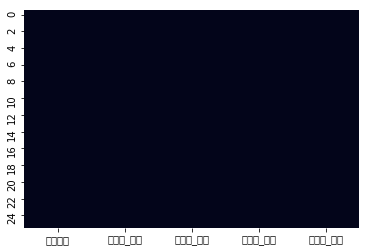

In [17]:
sns.heatmap(gen_years_df.isna(), cbar=False)

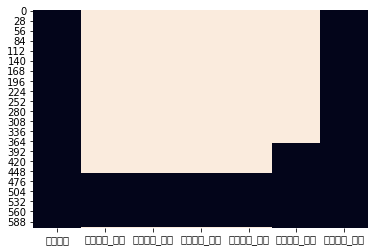

In [18]:
sns.heatmap(gen_months_provs_df.isna(), cbar=False)